In [128]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [129]:
data = pd.read_csv("Customer.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [130]:
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ,'Gender']]
data

C:\Users\baranit2\AppData\Local\Temp\ipykernel_5068\1955707445.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


***K-Means***

c:\Users\baranit2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\baranit2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\baranit2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\baranit2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

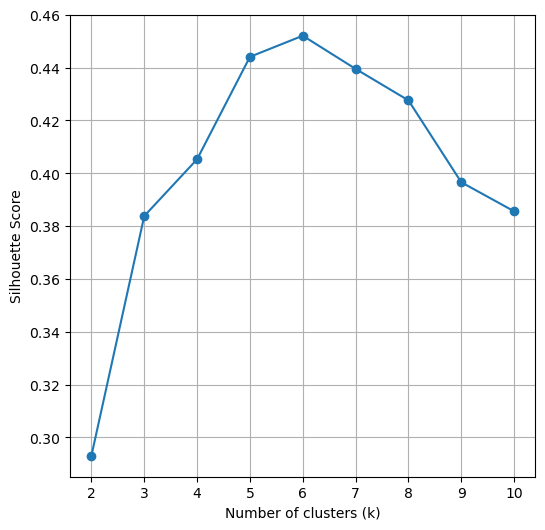

In [131]:
ks = range(2, min(11, len(features)))  # Ensure k is not greater than the number of data points

# Initialize lists to hold the silhouette scores and sample silhouettes
silhouette_scores = []
sample_silhouettes = []

# Try different values of k
for k in ks:
    kmeans = KMeans(n_clusters=k, init='k-means++' , n_init=20)
    kmeans.fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)
    silhouette_scores.append(score)
    sample_silhouettes.append(labels)

# Plot the silhouette scores
plt.figure(figsize=(6, 6))
plt.plot(ks, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(ks)  # Add this line for better x-ticks display
plt.grid()  # Optional: add grid for better readability
plt.show()


In [132]:

kmeans = KMeans(n_clusters=6, n_init=15)
kmeans_labels = kmeans.fit_predict(features)


c:\Users\baranit2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


***hierarchical***

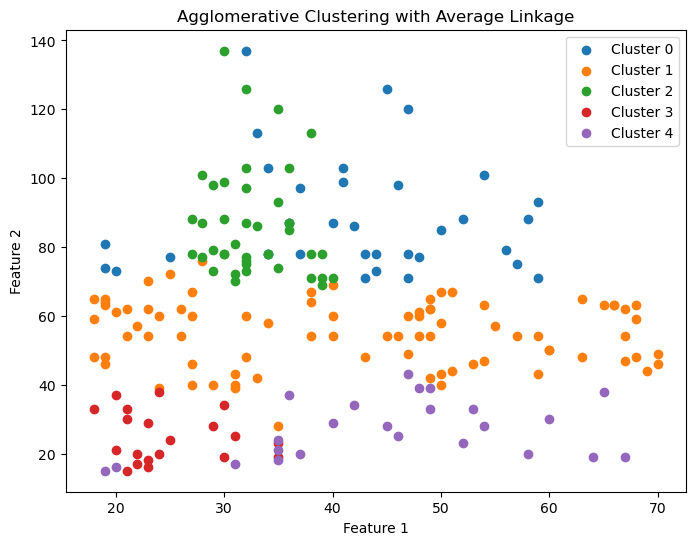

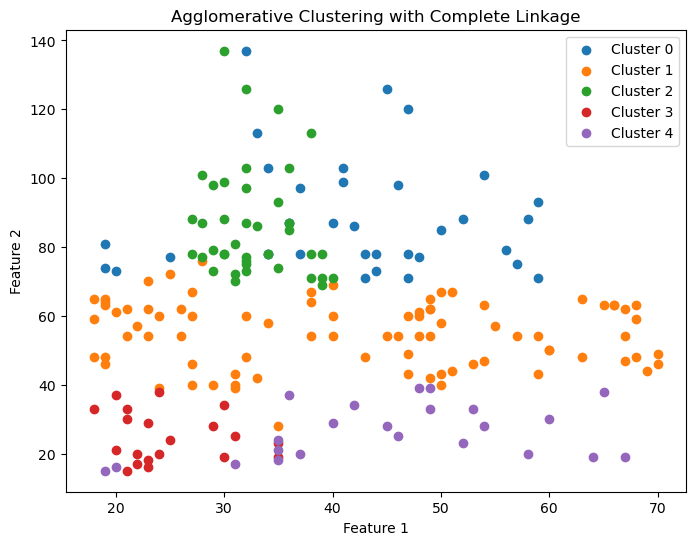

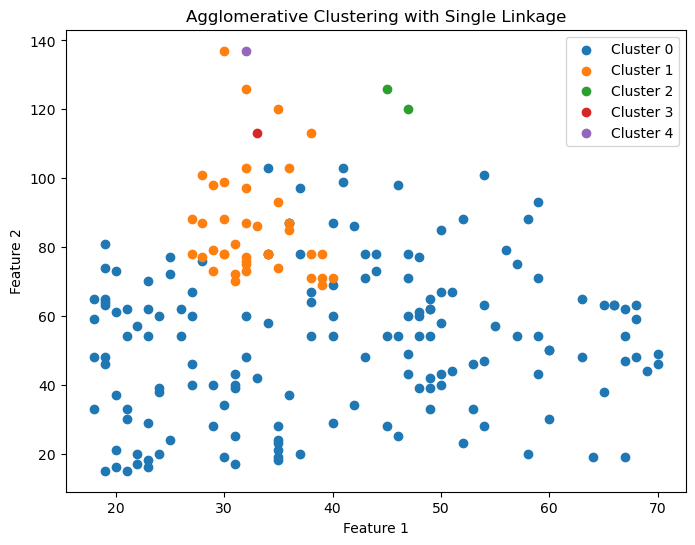

In [133]:
# Convert features to a NumPy array if it is a DataFrame
if isinstance(features, pd.DataFrame):
    features = features.values

# Apply hierarchical clustering with different linkage methods
hierarchical_ave = AgglomerativeClustering(n_clusters=5, linkage='average')
hierarchical_com = AgglomerativeClustering(n_clusters=5, linkage='complete')
hierarchical_sing = AgglomerativeClustering(n_clusters=5, linkage='single')

avehier_labels = hierarchical_ave.fit_predict(features)
comhier_labels = hierarchical_com.fit_predict(features)
singhier_labels = hierarchical_sing.fit_predict(features)

# Plotting the clusters
def plot_clusters(features, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(features[labels == label, 0], features[labels == label, 1], label=f'Cluster {label}')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Assuming the features have at least 2 dimensions for plotting
plot_clusters(features, avehier_labels, 'Agglomerative Clustering with Average Linkage')
plot_clusters(features, comhier_labels, 'Agglomerative Clustering with Complete Linkage')
plot_clusters(features, singhier_labels, 'Agglomerative Clustering with Single Linkage')


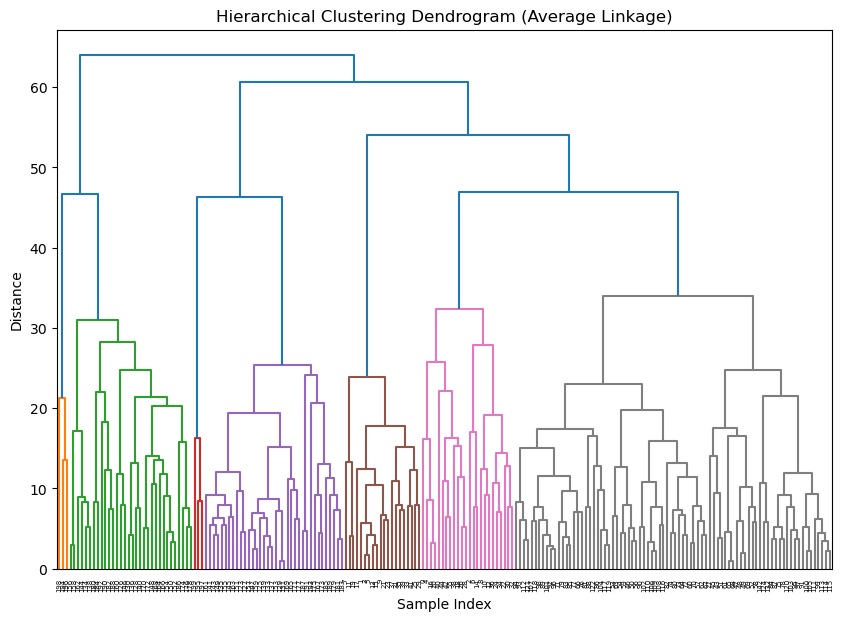

In [134]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(features, method='average')
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()


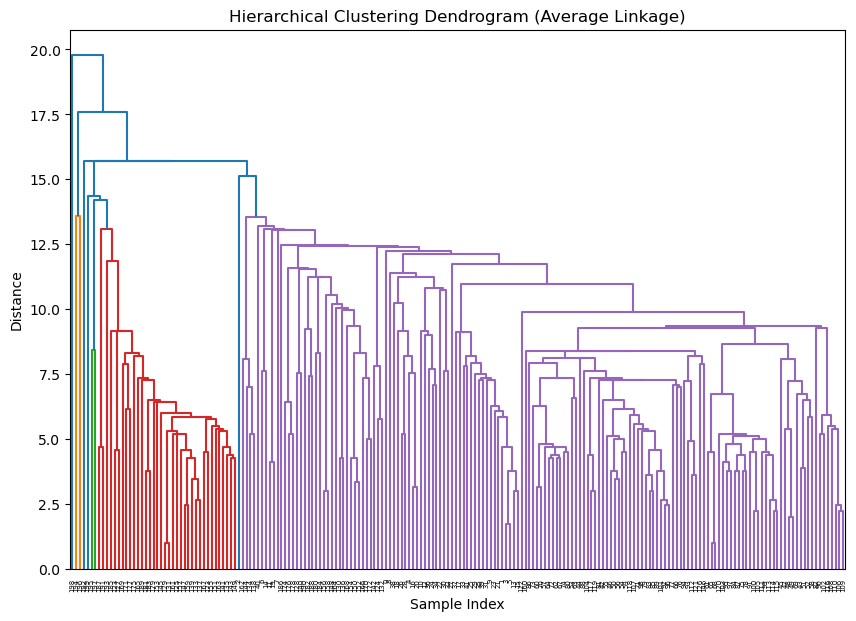

In [135]:
Z = linkage(features, method='single')  # You can use 'single', 'complete', etc.
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

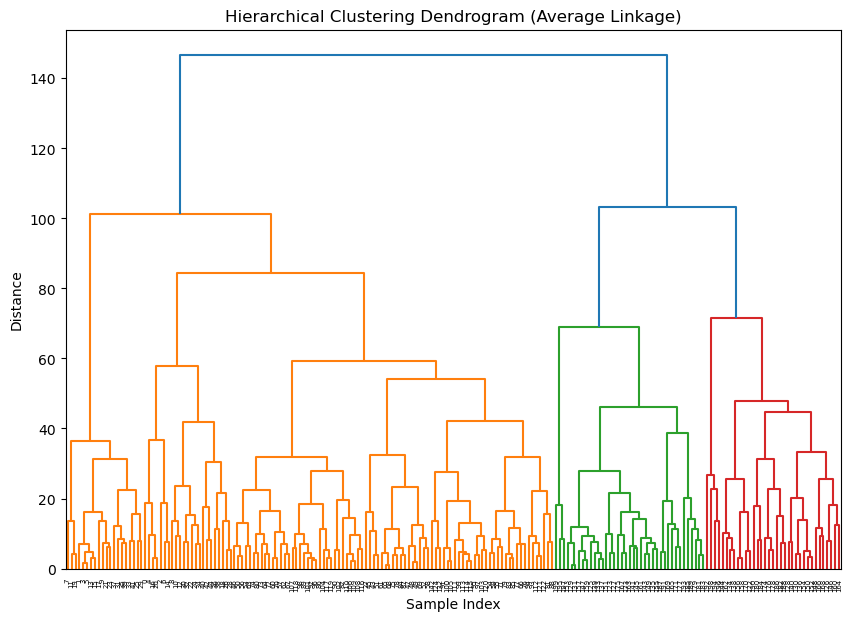

In [136]:
Z = linkage(features, method='complete')  # You can use 'single', 'complete', etc.
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

***DBCSAN***

In [137]:

dbscan = DBSCAN(eps=13 , min_samples=5)
dbscan_labels = dbscan.fit_predict(features)

# Remove noise (outliers) from DBSCAN labels
X_clean = features[dbscan_labels != -1]
dbscan_labels_clean = dbscan_labels[dbscan_labels != -1]

**Ploting**

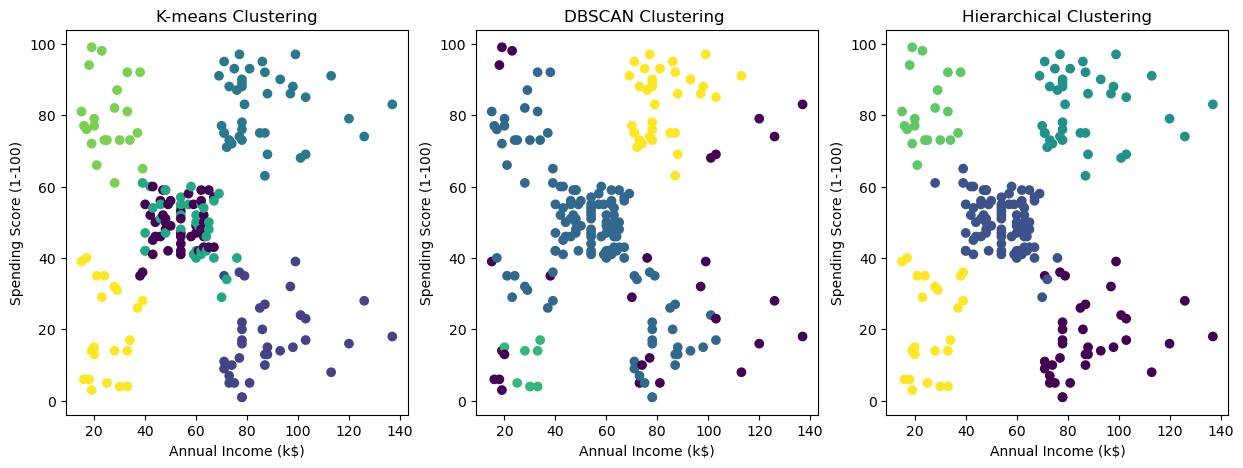

In [141]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# for K-means
axs[0].scatter(features[:, 1], features[:, 2], c=kmeans_labels, cmap="viridis")
axs[0].set_xlabel("Annual Income (k$)")
axs[0].set_ylabel("Spending Score (1-100)")
axs[0].set_title("K-means Clustering")

# for DBSCAN
axs[1].scatter(features[:, 1], features[:, 2], c=dbscan_labels, cmap="viridis")
axs[1].set_xlabel("Annual Income (k$)")
axs[1].set_ylabel("Spending Score (1-100)")
axs[1].set_title("DBSCAN Clustering ")

# for hierarchical clustering
axs[2].scatter(features[:, 1], features[:, 2], c=comhier_labels, cmap="viridis")
axs[2].set_xlabel("Annual Income (k$)")
axs[2].set_ylabel("Spending Score (1-100)")
axs[2].set_title("Hierarchical Clustering")

# Show the plot
plt.show()
